In [1]:
# Import dependencies
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 4.3 Compare different activation functions (sigmoid, Tanh, and ReLU)

In [2]:
# ################## Part 1: Load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

# Change batch_size here to test different values
batch_size = 32  # Experiment with different batch sizes: 32, 64, 128
trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [3]:
# ################## Part 2: Define Model and initialize ##################
def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

In [4]:
# ################## Part 3: Define Loss and optimizer ##################
criterion = torch.nn.MSELoss()

In [5]:
# ################## Part 4: Train and Test Functions ##################
def train_NN(optimizer, model):
    model.train()
    for images, labels in train_loader:
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item()

def test_NN(model, loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            out = model(images)
            loss += criterion(out, labels).item()
    loss /= len(loader)
    return loss

Testing ReLU activation function
Epoch: 000, Train Loss: 0.8893986, Test Loss: 1.0934367
Epoch: 100, Train Loss: 0.0005511, Test Loss: 0.0007331
Epoch: 200, Train Loss: 0.0003145, Test Loss: 0.0001574
Epoch: 300, Train Loss: 0.0000522, Test Loss: 0.0000628


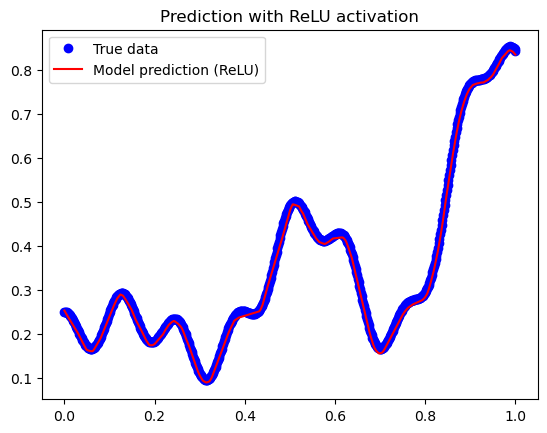

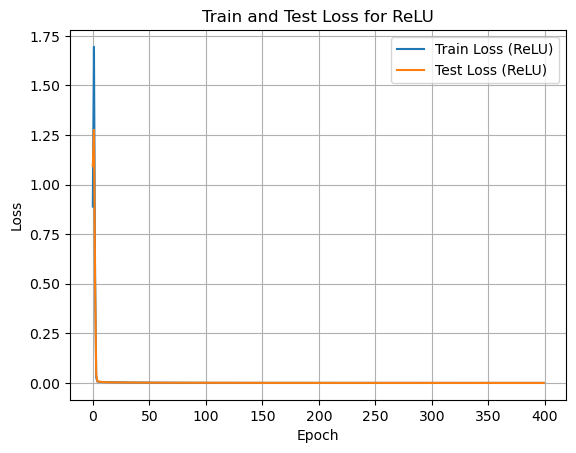

Testing Sigmoid activation function
Epoch: 000, Train Loss: 0.6068853, Test Loss: 0.9664480
Epoch: 100, Train Loss: 0.0169263, Test Loss: 0.0201778
Epoch: 200, Train Loss: 0.0152558, Test Loss: 0.0202157
Epoch: 300, Train Loss: 0.0119938, Test Loss: 0.0173541


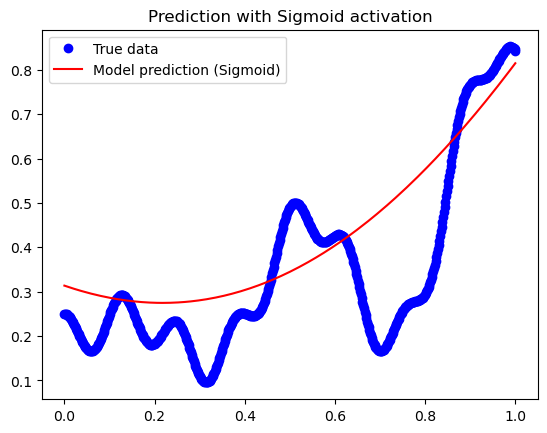

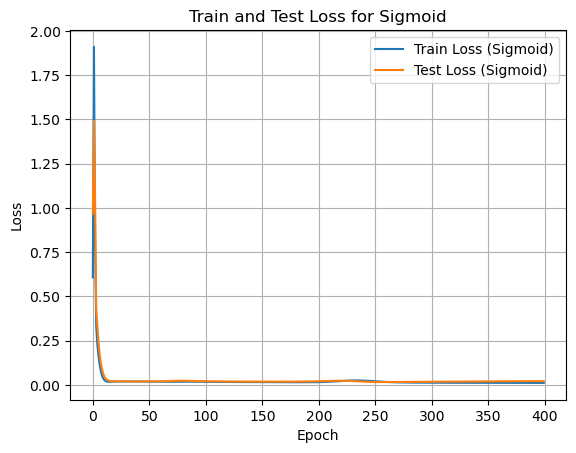

Testing Tanh activation function
Epoch: 000, Train Loss: 0.1610926, Test Loss: 0.1142495
Epoch: 100, Train Loss: 0.0116777, Test Loss: 0.0320398
Epoch: 200, Train Loss: 0.0148498, Test Loss: 0.0335571
Epoch: 300, Train Loss: 0.0182647, Test Loss: 0.0340703


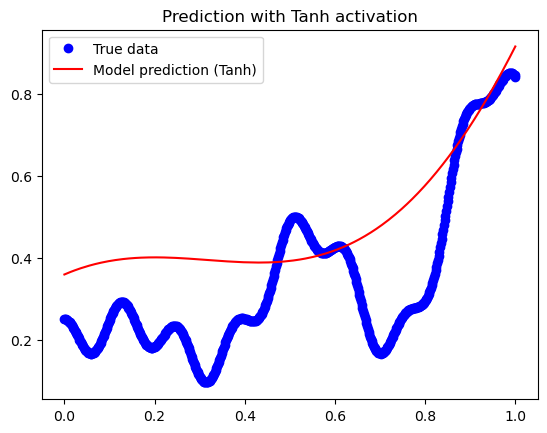

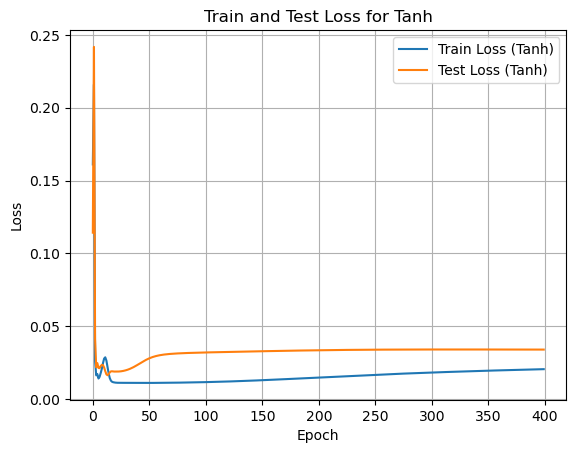

In [6]:
# ################## Compare Activation Functions ##################
activation_functions = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh()
}

N_epoch = 400  # You can adjust the number of epochs

for activation_name, activation in activation_functions.items():
    # Define the model with the current activation function
    model = nn.Sequential(
        nn.Linear(1, 1024, bias=True),
        activation,  # Use the current activation function
        nn.Linear(1024, 1, bias=True)
    )
    
    # Initialize weights
    model.apply(init_weights)

    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Initialize loss trackers
    train_loss = np.zeros((N_epoch, 1))
    test_loss = np.zeros((N_epoch, 1))

    print(f"Testing {activation_name} activation function")

    # Train the model
    for epoch in range(N_epoch):
        train_loss[epoch, 0] = train_NN(optimizer, model)
        test_loss[epoch, 0] = test_NN(model, test_loader)
        if epoch % 100 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {train_loss[epoch, 0]:.7f}, Test Loss: {test_loss[epoch, 0]:.7f}')
    
    # Final prediction and plot
    x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
    y_test = model(x_test)
    
    # Plot the results
    plt.figure()
    plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
    plt.plot(x_test, y_test.detach().numpy(), 'r', label=f'Model prediction ({activation_name})')
    plt.legend()
    plt.title(f"Prediction with {activation_name} activation")
    plt.show()

    # Plot train and test loss
    plt.figure()
    plt.plot(train_loss, label=f'Train Loss ({activation_name})')
    plt.plot(test_loss, label=f'Test Loss ({activation_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Train and Test Loss for {activation_name}')
    plt.grid(True)
    plt.show()

Compare different activation functions (sigmoid, Tanh, and ReLU): ReLU